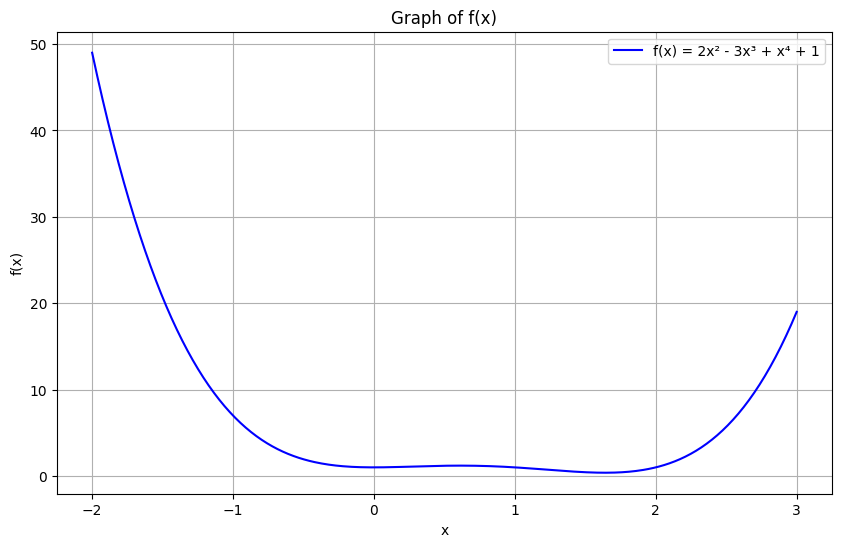

Best global minima approximation: x = 1.64038, f(x) = 0.38032, Epochs = 170


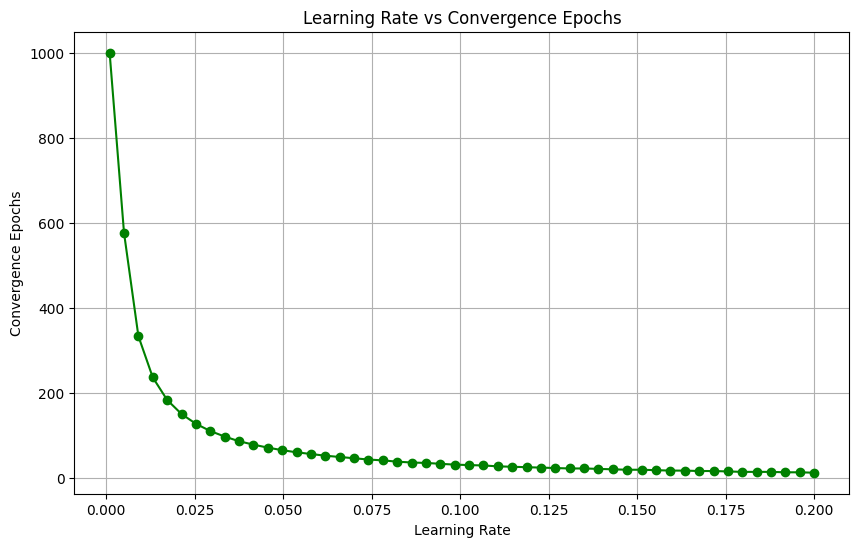

In [ ]:
#Q1
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def f(x):
    return 2 * x**2 - 3 * x**3 + x**4 + 1

def df(x):
    return 4 * x**3 - 9 * x**2 + 4 * x

# Part (a): Plot the graph of f(x)
x_vals = np.linspace(-2, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = 2x² - 3x³ + x⁴ + 1', color='blue')
plt.title('Graph of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Part (b): Gradient Descent Implementation
def gradient_descent(learning_rate=0.01, max_epochs=1000, tolerance=1e-6, initial_x=0.0):
    x = initial_x
    for epoch in range(max_epochs):
        grad = df(x)
        x_new = x - learning_rate * grad
        if abs(x_new - x) < tolerance:
            return x_new, epoch
        x = x_new
    return x, max_epochs

# Run from multiple initial points to find global minimum
initial_points = np.linspace(-2, 2, 10)
min_val = float('inf')
best_x = None
best_epoch = None
for x0 in initial_points:
    x_final, epoch = gradient_descent(learning_rate=0.01, initial_x=x0)
    if f(x_final) < min_val:
        min_val = f(x_final)
        best_x = x_final
        best_epoch = epoch
print(f"Best global minima approximation: x = {best_x:.5f}, f(x) = {min_val:.5f}, Epochs = {best_epoch}")

# Part (c): Learning Rate vs Convergence Epoch Plot
learning_rates = np.linspace(0.001, 0.2, 50)
convergence_epochs = []

for lr in learning_rates:
    try:
        x_final, epoch = gradient_descent(learning_rate=lr, initial_x=0.5)
        convergence_epochs.append(epoch)
    except:
        convergence_epochs.append(None)
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, convergence_epochs, marker='o', color='green')
plt.title('Learning Rate vs Convergence Epochs')
plt.xlabel('Learning Rate')
plt.ylabel('Convergence Epochs')
plt.grid(True)
plt.show()


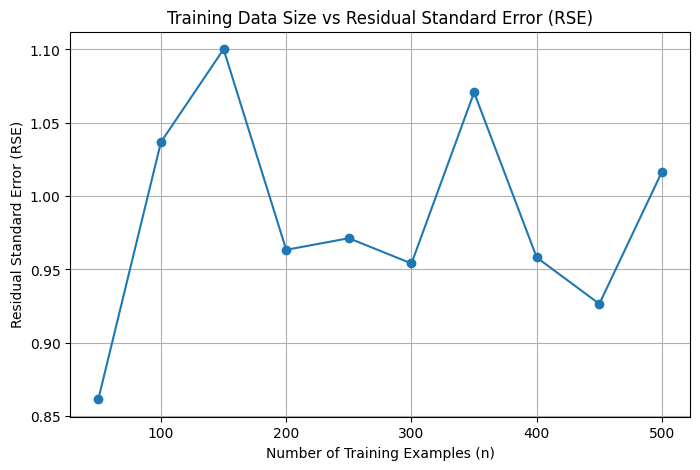

In [ ]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---------- Step 1: Create synthetic data ----------
np.random.seed(0)  # For reproducibility
n_total = 500  # Total number of data points
X = 2 * np.random.rand(n_total, 1)
y = 4 + 3 * X + np.random.randn(n_total, 1)  # y = 4 + 3x + noise

# ---------- Step 2: Linear Regression using Gradient Descent ----------
def linear_regression_gd(X_train, y_train, lr=0.01, epochs=1000):
    m = X_train.shape[0]
    X_b = np.c_[np.ones((m, 1)), X_train]  # Add bias (x0 = 1)
    theta = np.zeros((2, 1))  # Initialize weights

    for _ in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta -= lr * gradients

    return theta  # returns (bias, weight)

# ---------- Step 3: Residual Standard Error (RSE) ----------
def calculate_rse(X_test, y_test, theta):
    m = X_test.shape[0]
    X_b = np.c_[np.ones((m, 1)), X_test]
    predictions = X_b.dot(theta)
    residuals = y_test - predictions
    rss = np.sum(residuals ** 2)
    rse = np.sqrt(rss / (m - 2))
    return rse

# ---------- Step 4: Loop over dataset sizes ----------
train_sizes = np.linspace(0.1, 1.0, 10)
rse_list = []

for frac in train_sizes:
    n_train = int(frac * n_total)

    # Split and take first n_train examples for training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_small = X_train[:n_train]
    y_train_small = y_train[:n_train]

    theta = linear_regression_gd(X_train_small, y_train_small)
    rse = calculate_rse(X_test, y_test, theta)
    rse_list.append(rse)

# ---------- Step 5: Plot n vs RSE ----------
plt.figure(figsize=(8, 5))
plt.plot((train_sizes * n_total), rse_list, marker='o')
plt.title("Training Data Size vs Residual Standard Error (RSE)")
plt.xlabel("Number of Training Examples (n)")
plt.ylabel("Residual Standard Error (RSE)")
plt.grid(True)
plt.show()


Enter number of data points (n): 50


<ipython-input-9-28e37ee4bb72>:25: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * gradients


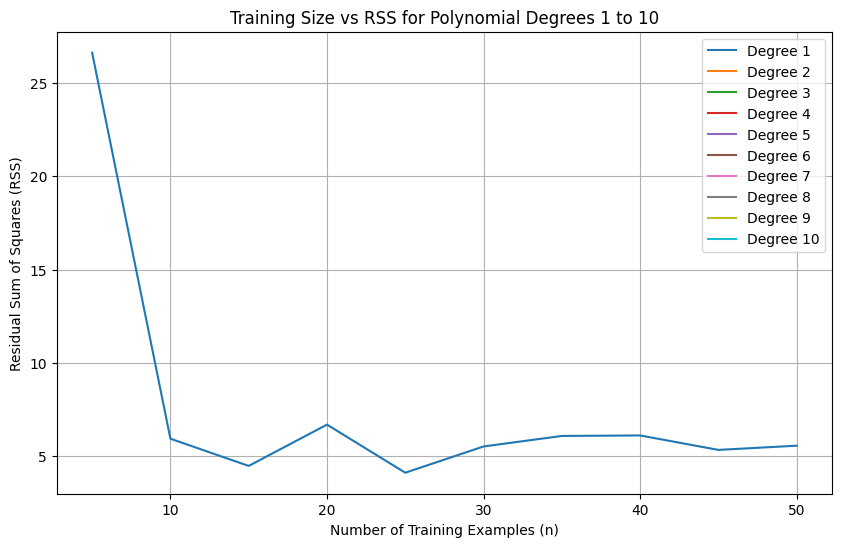

In [ ]:
#Q3.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---------- Step 1: Input from user ----------
n = int(input("Enter number of data points (n): "))
np.random.seed(0)

# ---------- Step 2: Generate sine data with Gaussian noise ----------
X = np.sort(2 * np.pi * np.random.rand(n, 1), axis=0)  # X in [0, 2π]
noise = np.random.normal(0, np.sqrt(0.3), size=(n, 1))
y = np.sin(X) + noise

# ---------- Helper: Create polynomial features ----------
def poly_features(X, degree):
    return np.hstack([X**i for i in range(degree + 1)])

# ---------- Helper: Gradient descent for polynomial regression ----------
def gradient_descent(X_poly, y, lr=0.01, epochs=1000):
    m = X_poly.shape[0]
    theta = np.zeros((X_poly.shape[1], 1))
    for _ in range(epochs):
        gradients = 2/m * X_poly.T.dot(X_poly.dot(theta) - y)
        theta -= lr * gradients
    return theta

# ---------- Helper: Compute RSS ----------
def compute_rss(X_poly, y, theta):
    predictions = X_poly.dot(theta)
    residuals = y - predictions
    rss = np.sum(residuals ** 2)
    return rss

# ---------- Step 3: Loop over degrees 1 to 10 ----------
train_fractions = np.linspace(0.1, 1.0, 10)
results = {}

for degree in range(1, 11):
    rss_list = []
    for frac in train_fractions:
        # Create train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # Use only a fraction of training data
        n_frac = int(frac * len(X_train))
        X_train_frac = X_train[:n_frac]
        y_train_frac = y_train[:n_frac]

        # Create polynomial features
        X_poly_train = poly_features(X_train_frac, degree)
        X_poly_test = poly_features(X_test, degree)

        # Train using gradient descent
        theta = gradient_descent(X_poly_train, y_train_frac)

        # Compute RSS on test data
        rss = compute_rss(X_poly_test, y_test, theta)
        rss_list.append(rss)

    results[degree] = rss_list

# ---------- Step 4: Plot n vs RSS for each polynomial degree ----------
plt.figure(figsize=(10, 6))
for degree in results:
    plt.plot(train_fractions * n, results[degree], label=f'Degree {degree}')
plt.xlabel("Number of Training Examples (n)")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.title("Training Size vs RSS for Polynomial Degrees 1 to 10")
plt.legend()
plt.grid(True)
plt.show()


Enter number of data points (n): 50


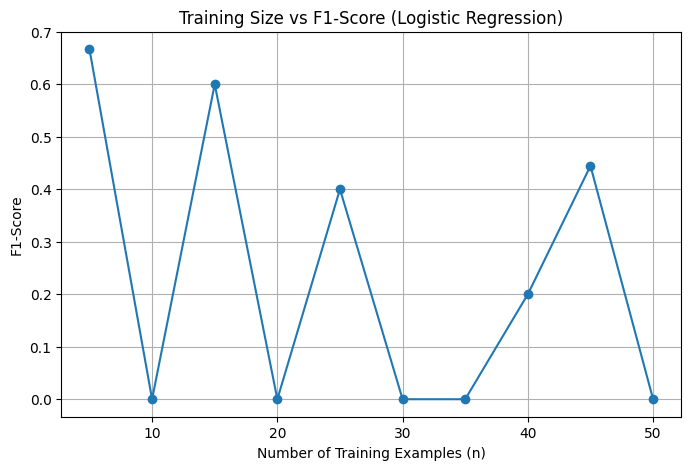

In [ ]:
#Q4.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---------- Step 1: Generate synthetic binary classification data ----------
np.random.seed(0)
n = int(input("Enter number of data points (n): "))
X = 2 * np.random.rand(n, 2) - 1  # Input features in [-1, 1]
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)  # Class 1 if product > 0, else class 0

# ---------- Helper: Sigmoid Function ----------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------- Helper: Gradient Descent for Logistic Regression ----------
def logistic_regression(X, y, lr=0.1, epochs=1000):
    m, n_features = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.zeros((n_features + 1, 1))

    for _ in range(epochs):
        z = X_b.dot(theta)
        h = sigmoid(z)
        gradient = X_b.T.dot(h - y) / m
        theta -= lr * gradient

    return theta

# ---------- Helper: Prediction Function ----------
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return (sigmoid(X_b.dot(theta)) >= 0.5).astype(int)

# ---------- Helper: Precision, Recall, F1-Score ----------
def compute_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    return precision, recall, f1

# ---------- Step 2: Train for different fractions of data ----------
fractions = np.linspace(0.1, 1.0, 10)
f1_scores = []

for frac in fractions:
    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Use only fraction of training data
    n_frac = int(frac * len(X_train))
    X_train_frac = X_train[:n_frac]
    y_train_frac = y_train[:n_frac]

    # Train model
    theta = logistic_regression(X_train_frac, y_train_frac)

    # Predict on test set
    y_pred = predict(X_test, theta)

    # Evaluate
    precision, recall, f1 = compute_metrics(y_test, y_pred)
    f1_scores.append(f1)

# ---------- Step 3: Plot n vs F1-Score ----------
plt.figure(figsize=(8, 5))
plt.plot(fractions * n, f1_scores, marker='o')
plt.xlabel("Number of Training Examples (n)")
plt.ylabel("F1-Score")
plt.title("Training Size vs F1-Score (Logistic Regression)")
plt.grid(True)
plt.show()


In [ ]:
#Q5.
import numpy as np
from collections import Counter

# ---------- Step 1: Sample training data ----------
# Each row is a point: [feature1, feature2, ..., class_label]
training_data = np.array([
    [1.0, 2.0, 0],
    [1.5, 1.8, 0],
    [5.0, 8.0, 1],
    [6.0, 9.0, 1],
    [1.2, 0.8, 0],
    [6.1, 8.5, 1]
])

# Split features and labels
X_train = training_data[:, :-1]  # features
y_train = training_data[:, -1]   # labels

# ---------- Step 2: Test samples ----------
test_samples = np.array([
    [1.1, 1.0],
    [5.5, 9.0]
])

k = 3  # Number of nearest neighbors

# ---------- Step 3: KNN Prediction Function ----------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, test_point, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(test_point, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort()  # sort by distance
    k_nearest_labels = [label for (_, label) in distances[:k]]
    prediction = Counter(k_nearest_labels).most_common(1)[0][0]
    return prediction

# ---------- Step 4: Predict and print results ----------
print("Predicted class labels for test samples:")
for test in test_samples:
    label = knn_predict(X_train, y_train, test, k)
    print(f"Test sample {test} → Predicted class: {int(label)}")


Predicted class labels for test samples:
Test sample [1.1 1. ] → Predicted class: 0
Test sample [5.5 9. ] → Predicted class: 1


In [ ]:
#Q6.

import numpy as np

# ---------- Step 1: Sample binary training data ----------
# Each row: [feature1, feature2, ..., class_label]
# Features are binary (0 or 1)
training_data = np.array([
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [0, 1, 1, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 0]
])

X_train = training_data[:, :-1]  # features
y_train = training_data[:, -1]   # labels
classes = np.unique(y_train)

# ---------- Step 2: Test samples ----------
test_samples = np.array([
    [1, 0, 1],
    [0, 1, 1]
])

# ---------- Step 3: Train Bernoulli Naive Bayes ----------
def train_bernoulli_nb(X, y):
    n_samples, n_features = X.shape
    model = {}
    for c in classes:
        X_c = X[y == c]
        prob = (np.sum(X_c, axis=0) + 1) / (X_c.shape[0] + 2)  # Add-1 Laplace smoothing
        model[c] = {
            'prior': X_c.shape[0] / n_samples,
            'feature_probs': prob
        }
    return model

# ---------- Step 4: Predict function ----------
def predict_bernoulli_nb(model, x):
    results = {}
    for c in model:
        prior = np.log(model[c]['prior'])  # Use log to avoid underflow
        probs = model[c]['feature_probs']
        log_likelihood = np.sum(x * np.log(probs) + (1 - x) * np.log(1 - probs))
        results[c] = prior + log_likelihood
    return max(results, key=results.get)

# ---------- Step 5: Train model and predict ----------
model = train_bernoulli_nb(X_train, y_train)

print("Predicted class labels for test samples:")
for test in test_samples:
    label = predict_bernoulli_nb(model, test)
    print(f"Test sample {test} → Predicted class: {int(label)}")


Predicted class labels for test samples:
Test sample [1 0 1] → Predicted class: 0
Test sample [0 1 1] → Predicted class: 1


In [ ]:
#Q7.

import numpy as np

# ---------- Step 1: Sample training data ----------
# Each row: [feature1, feature2, ..., class_label]
# Features represent counts (e.g., word frequencies)
training_data = np.array([
    [2, 1, 0],  # 2 occurrences of feature 1, 1 occurrence of feature 2, class = 0
    [1, 2, 1],  # 1 occurrence of feature 1, 2 occurrences of feature 2, class = 1
    [0, 1, 0],  # 0 occurrence of feature 1, 1 occurrence of feature 2, class = 0
    [1, 1, 1],  # 1 occurrence of feature 1, 1 occurrence of feature 2, class = 1
    [2, 0, 0],  # 2 occurrences of feature 1, 0 occurrences of feature 2, class = 0
])

X_train = training_data[:, :-1]  # features
y_train = training_data[:, -1]   # labels
classes = np.unique(y_train)
n_classes = len(classes)

# ---------- Step 2: Test samples ----------
test_samples = np.array([
    [1, 1],  # Test sample with 1 occurrence of feature 1, 1 occurrence of feature 2
    [2, 0]   # Test sample with 2 occurrences of feature 1, 0 occurrences of feature 2
])

# ---------- Step 3: Train Multinomial Naive Bayes with Add-1 Laplace Smoothing ----------
def train_multinomial_nb(X, y):
    n_samples, n_features = X.shape
    model = {}

    for c in classes:
        # Get the data for class c
        X_c = X[y == c]

        # Calculate the prior probability P(c)
        prior = X_c.shape[0] / n_samples

        # Calculate the feature counts (adding 1 for Laplace smoothing)
        feature_counts = np.sum(X_c, axis=0) + 1  # Add-1 smoothing
        total_feature_count = np.sum(feature_counts)

        # Calculate the probability of each feature for class c
        feature_probs = feature_counts / total_feature_count
        model[c] = {'prior': prior, 'feature_probs': feature_probs}

    return model

# ---------- Step 4: Predict function ----------
def predict_multinomial_nb(model, x):
    results = {}

    for c in model:
        prior = np.log(model[c]['prior'])  # Log prior for numerical stability
        feature_probs = model[c]['feature_probs']
        log_likelihood = np.sum(x * np.log(feature_probs))  # Sum of log probabilities for features
        results[c] = prior + log_likelihood

    # Return the class with the highest log probability
    return max(results, key=results.get)

# ---------- Step 5: Train model and predict ----------
model = train_multinomial_nb(X_train, y_train)

print("Predicted class labels for test samples:")
for test in test_samples:
    label = predict_multinomial_nb(model, test)
    print(f"Test sample {test} → Predicted class: {int(label)}")


Predicted class labels for test samples:
Test sample [1 1] → Predicted class: 0
Test sample [2 0] → Predicted class: 0


In [ ]:
#Q8.
# Importing required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# ---------- Step 1: Create a simple dataset ----------
# Features: [Feature1, Feature2], Label: 0 or 1
X = np.array([[1.2, 3.1], [2.3, 1.8], [3.1, 2.4], [2.9, 2.0], [3.6, 1.2],
              [1.5, 3.2], [1.9, 2.3], [2.5, 3.3], [3.2, 2.5], [2.0, 1.9]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Step 2: Train the Naïve Bayes Classifier ----------
nb_classifier = GaussianNB()  # Gaussian Naive Bayes for continuous data
nb_classifier.fit(X_train, y_train)

# ---------- Step 3: Train the Logistic Regression Classifier ----------
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# ---------- Step 4: Make Predictions ----------
y_pred_nb = nb_classifier.predict(X_test)  # Naïve Bayes predictions
y_pred_lr = lr_classifier.predict(X_test)  # Logistic Regression predictions

# ---------- Step 5: Evaluate the performance with confusion matrix and classification report ----------
print("Naïve Bayes Classifier Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

print("\nLogistic Regression Classifier Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Naïve Bayes Classifier Evaluation:
Confusion Matrix:
 [[1 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Logistic Regression Classifier Evaluation:
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Q9
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ---------- Step 1: Load and split Breast Cancer dataset ----------
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Step 2: Define classifiers ----------
classifiers = [
    ("Decision Tree", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)),
    ("Logistic Regression", AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50, random_state=42)),
    ("Random Forest", AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=10), n_estimators=10, random_state=42))
]

# ---------- Step 3: Train and evaluate each AdaBoost model ----------
for name, model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"AdaBoost with {name}: Accuracy = {accuracy:.4f}")


AdaBoost with Decision Tree: Accuracy = 0.9649
AdaBoost with Logistic Regression: Accuracy = 0.9737
AdaBoost with Random Forest: Accuracy = 0.9825


In [ ]:
#Q10.
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# ---------- Step 1: Load dataset ----------
X, y = load_breast_cancer(return_X_y=True)

# ---------- Step 2: Split into train and test sets ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Step 3: Define classifiers ----------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# ---------- Step 4: Train, predict, and evaluate each classifier ----------
for name, model in models.items():
    model.fit(X_train, y_train)              # Train model
    y_pred = model.predict(X_test)           # Predict on test set
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred, digits=4))  # Show Precision, Recall, F1-score


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
              precision    recall  f1-score   support

           0     0.9750    0.9070    0.9398        43
           1     0.9459    0.9859    0.9655        71

    accuracy                         0.9561       114
   macro avg     0.9605    0.9464    0.9526       114
weighted avg     0.9569    0.9561    0.9558       114


Decision Tree Performance:
              precision    recall  f1-score   support

           0     0.9286    0.9070    0.9176        43
           1     0.9444    0.9577    0.9510        71

    accuracy                         0.9386       114
   macro avg     0.9365    0.9324    0.9343       114
weighted avg     0.9385    0.9386    0.9384       114


Random Forest Performance:
              precision    recall  f1-score   support

           0     0.9524    0.9302    0.9412        43
           1     0.9583    0.9718    0.9650        71

    accuracy                         0.9561       114
   macro avg     0.9554    0.9510    0